<a href="https://colab.research.google.com/github/gytrishi/traffic-hw/blob/main/car_following_models_pipes_and_GM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!git clone https://github.com/gytrishi/traffic-hw.git

fatal: destination path 'traffic-hw' already exists and is not an empty directory.


In [25]:
import pandas as pd

In [26]:
def minimum(a, b):
      
    if a <= b:
        return a
    else:
        return b
def maximum(a, b):
      
    if a >= b:
        return a
    else:
        return b

In [27]:
pd.read_excel('/content/traffic-hw/car_following.xlsx',usecols="A:g",names=["t","v(t,i-1)",	"x(t,i-1)",	"x(t,i)",	"si(t)","si(tmin)","v(t,i)"])

,t,"v(t,i-1)","x(t,i-1)","x(t,i)",si(t),si(tmin),"v(t,i)"
0,0,0,5000,NaN,NaN,NaN,NaN
1,1,0,5000,NaN,NaN,NaN,NaN
2,2,0,5000,NaN,NaN,NaN,NaN
3,3,0,5000,NaN,NaN,NaN,NaN
4,4,0,5000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
496,496,0,8762,NaN,NaN,NaN,NaN
497,497,0,8762,NaN,NaN,NaN,NaN
498,498,0,8762,NaN,NaN,NaN,NaN
499,499,0,8762,NaN,NaN,NaN,NaN


In [28]:
car=pd.read_excel('/content/traffic-hw/car_following.xlsx',usecols= "A:g")
car1=pd.DataFrame(car)
car1

,Time,"v(t,i-1)","x(t,i-1)"
0,0,0,5000
1,1,0,5000
2,2,0,5000
3,3,0,5000
4,4,0,5000
...,...,...,...
496,496,0,8762
497,497,0,8762
498,498,0,8762
499,499,0,8762


In [29]:
def pipes(acceleration=4,deacceleration=6,dt=1,v0=0,x1=-102,l=6,vd=30): 
  sit=[]
  vel=[]
  minsit=[]
  x=[]
  a= acceleration
  d= deacceleration
  for t in range(0,501):
    if t==0:
      sit.append(0)
      vel.append(v0)
      minsit.append(0)
      x.append(x1)
    else:
      s =(car1.iloc[t-1,2])-x[t-1]
      sit.append(s)
      mins=((vel[t-1]/4.47)+1)*(l)
      minsit.append(mins)
      if sit[t]<minsit[t]:
        k=vel[t-1]-d*dt
        vel.append(maximum(0,k))
      else:
        k=vel[t-1]+a*dt
        vel.append(minimum(vd,k))
    xt=x[t-1]+vel[t]*dt
    if t>0:
      x.append(xt)
  return sit,minsit,vel,x

     Time  v(t,i-1)  x(t,i-1)  x(t,i)  ...  x(t,i)  Si(t))   Simin(t)  v(t,i)
0       0         0      5000    -102  ...   -1002       0   0.000000       0
1       1         0      5000     -98  ...    -998    6002   6.000000       4
2       2         0      5000     -90  ...    -990    5998  11.369128       8
3       3         0      5000     -78  ...    -978    5990  16.738255      12
4       4         0      5000     -62  ...    -962    5978  22.107383      16
..    ...       ...       ...     ...  ...     ...     ...        ...     ...
496   496         0      8762    8784  ...    8790     -28   6.000000       0
497   497         0      8762    8784  ...    8790     -28   6.000000       0
498   498         0      8762    8784  ...    8790     -28   6.000000       0
499   499         0      8762    8784  ...    8790     -28   6.000000       0
500   500         0      8762    8784  ...    8790     -28   6.000000       0

[501 rows x 43 columns]


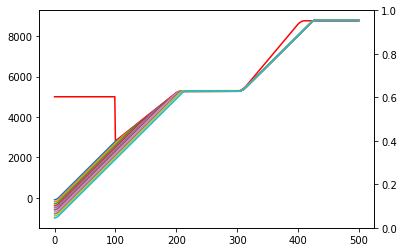

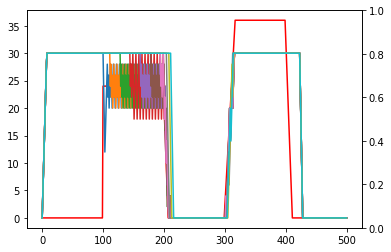

In [30]:
for i in range(10):
  a,b,c,d=pipes(4,6,1,0,(-102+(-100)*i),6,30)
  car1.insert((3+4*i),"x(t,i)",d,True)
  car1.insert((4+4*i),"Si(t))",a,True)
  car1.insert((5+4*i),"Simin(t)",b,True)
  car1.insert((6+4*i),"v(t,i)",c,True)
print(car1)
import matplotlib.pyplot as plt
#plot positions
x= car1.Time
y1= car1['x(t,i-1)']
y2= car1['x(t,i)']
fig, ax1= plt.subplots()
ax2= ax1.twinx()
curve1= ax1.plot(x,y1,label='x(t,i-1)',color='r')
curve2= ax1.plot(x,y2,label='x(t,i)')
#plot speed
x= car1.Time
y1= car1['v(t,i-1)']
y2= car1['v(t,i)']
fig, ax1= plt.subplots()
ax2= ax1.twinx()
curve1= ax1.plot(x,y1,label='x(v,i-1)',color='r')
curve2= ax1.plot(x,y2,label='v(t,i)')
car1.to_excel("car_following_assignment_pipes.xlsx")



In [31]:
car=pd.read_excel('/content/traffic-hw/car_following.xlsx',usecols= "A:g")
car2=pd.DataFrame(car)
car2

,Time,"v(t,i-1)","x(t,i-1)"
0,0,0,5000
1,1,0,5000
2,2,0,5000
3,3,0,5000
4,4,0,5000
...,...,...,...
496,496,0,8762
497,497,0,8762
498,498,0,8762
499,499,0,8762


In [32]:
def GM(dt=1,v0=30,x1=467,alpha=0.8,a0=0): 
  sit=[]
  vel=[]
  acc=[]
  x=[]
  dv=[]
  for t in range(0,501):
    if t==0:
      vel.append(v0)
      x.append(x1)
      acc.append(a0)
      s =(car1.iloc[t,2])-x[t]
      sit.append(s)
      delv=(car1.iloc[t,1])-vel[t]
      dv.append(delv)
    else:
      a=(alpha*(vel[t-1])*dv[t-1])/sit[t-1]
      acc.append(a)
      k=vel[t-1]+acc[t]*dt
      vel.append(maximum(0,k))
      xt=x[t-1]+vel[t]*dt
      x.append(xt)
      s =(car1.iloc[t,2])-x[t]
      sit.append(s)
      delv=(car1.iloc[t,1])-vel[t]
      dv.append(delv)
  return x,sit,dv,acc,vel

     Time  v(t,i-1)  x(t,i-1)  ...         dv       acc        vel
0       0         0      5000  ... -30.000000  0.000000  30.000000
1       1         0      5000  ... -29.867477 -0.132523  29.867477
2       2         0      5000  ... -29.735395 -0.132081  29.735395
3       3         0      5000  ... -29.603755 -0.131640  29.603755
4       4         0      5000  ... -29.472555 -0.131200  29.472555
..    ...       ...       ...  ...        ...       ...        ...
496   496         0      8762  ...  -6.824830 -0.126847   6.824830
497   497         0      8762  ...  -6.699770 -0.125061   6.699770
498   498         0      8762  ...  -6.576478 -0.123292   6.576478
499   499         0      8762  ...  -6.454938 -0.121540   6.454938
500   500         0      8762  ...  -6.335132 -0.119806   6.335132

[501 rows x 53 columns]


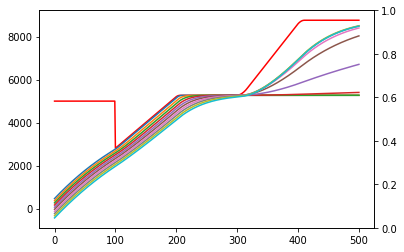

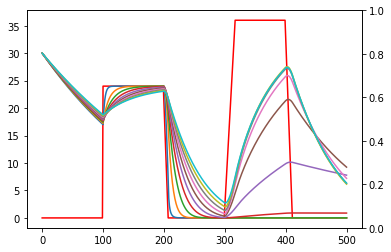

In [33]:
for i in range(10):
  a,b,c,d,e=GM(1,30,(467+(-100)*i),0.8,0)
  car2.insert((3+5*i),"x(t,i)",a,True)
  car2.insert((4+5*i),"Si(t))",b,True)
  car2.insert((5+5*i),"dv",c,True)
  car2.insert((6+5*i),"acc",d,True)
  car2.insert((7+5*i),"vel",e,True)
print(car2)
import matplotlib.pyplot as plt
x= car2.Time
y1= car2['x(t,i-1)']
y2= car2['x(t,i)']
fig, ax1= plt.subplots()
ax2= ax1.twinx()
curve1= ax1.plot(x,y1,label='x(t,i-1)',color='r')
curve2= ax1.plot(x,y2,label='x(t,i)')
#plot speed
x= car2.Time
y1= car2['v(t,i-1)']
y2= car2['vel']
fig, ax1= plt.subplots()
ax2= ax1.twinx()
curve1= ax1.plot(x,y1,label='x(v,i-1)',color='r')
curve2= ax1.plot(x,y2,label='v(t,i)')
car2.to_excel("car_following_assignment_GM.xlsx")